In [2]:
import wfdb
import scipy
import numpy as np

from matplotlib import pyplot as plt
import math
from statsmodels.graphics import tsaplots
import statsmodels.api as sm

from FeatureExtraction_NB import processing

In [3]:
patient_1 = wfdb.rdrecord('..//01.Dataset/117/s0291lre', channels=[1])
patient_2 = wfdb.rdrecord('..//01.Dataset/116/s0302lre', channels=[1])
signal_1 = patient_1.p_signal[:, 0]
denoised_signal1,_,_= processing(signal_1)
signal_2 = patient_2.p_signal[:, 0]
denoised_signal2,_,_ = processing(signal_2)

In [4]:
print(len(signal_1))
print(len(signal_2))

115200
115200


In [5]:
type(signal_1[0])

numpy.float64

In [6]:
#apply AC and DCT 
def nonFiducial(signal):
    Auto_corr=sm.tsa.acf(signal,nlags=len(signal))
    
    s1=Auto_corr[:1100]

    DcT=scipy.fftpack.dct(s1,type=2)

    # take only non zero signal
    dct = DcT[:100]
    
    components=[signal,Auto_corr,s1,DcT,dct]
    return components

In [7]:
type(denoised_signal1[0])

numpy.float64

In [8]:
arr_components1 = nonFiducial(denoised_signal1)

arr_components2 = nonFiducial(denoised_signal2.tolist())

arr_components = arr_components1 + arr_components2

feature1 =  arr_components1[4]

print(len(feature1))

c:\Users\Samy\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


100


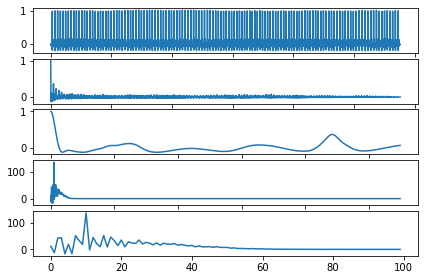

In [9]:
fig , ax = plt.subplots(5)

row= 0 
for i in range(0,5):
    ax[row].plot(arr_components1[i])
    ax[row].set_title("")
    row+=1
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout(h_pad=0)

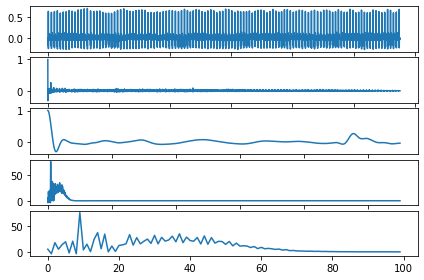

In [10]:
fig , ax = plt.subplots(5)

row= 0 
for i in range(0,5):
    ax[row].plot(arr_components2[i])
    ax[row].set_title("")
    row+=1
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout(h_pad=0)

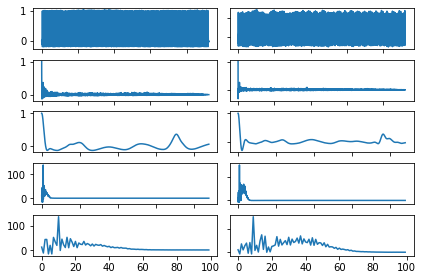

In [11]:
fig , ax = plt.subplots(5,2)

row= 0 
col = 0
count =0
for i in range(0,10):
    ax[row,col].plot(arr_components[i])
    ax[row,col].set_title("")
    count+=1 
    row+=1
    if(count%5 == 0):
        col+=1
        row=0
for ax in fig.get_axes():
    ax.label_outer()
fig.tight_layout(h_pad=0.5,w_pad=0.5)

# Training and Testing

In [12]:
fs = 1000
# best start = 1300, best end = 3200
patient_1 = wfdb.rdrecord('..//01.Dataset/117/s0291lre', channels=[1])
patient_2 = wfdb.rdrecord('..//01.Dataset/116/s0302lre', channels=[1])
patient_3 = wfdb.rdrecord('..//01.Dataset/105/s0303lre', channels=[1])
patient_4 = wfdb.rdrecord('..//01.Dataset/104/s0306lre', channels=[1])
patient_5 = wfdb.rdrecord('..//01.Dataset/122/s0312lre', channels=[1])
patient_6 = wfdb.rdrecord('..//01.Dataset/150/s0287lre', channels=[1])

signal_1,_,_ = processing(patient_1.p_signal[: ,0])
signal_2 ,_,_= processing(patient_2.p_signal[:, 0])
signal_3 ,_,_= processing(patient_3.p_signal[:, 0])
signal_4,_,_ = processing(patient_4.p_signal[:, 0])
signal_5 ,_,_= processing(patient_5.p_signal[:, 0])
signal_6 ,_,_= processing(patient_6.p_signal[:, 0])


time = len(signal_1)/ fs


In [13]:
#apply AC and DCT 
def nonFiducial(signal):
    Auto_corr=sm.tsa.acf(signal,nlags=len(signal))
    
    s1=Auto_corr[:1100]

    DcT=scipy.fftpack.dct(s1,type=2)

    # take only non zero signal
    dct = DcT[:100]
    
    components=[signal,Auto_corr,s1,DcT,dct]
    return components[4]

In [14]:
cmp1 = nonFiducial(signal_1).reshape(100,1)
cmp2 = nonFiducial(signal_2).reshape(100,1)
cmp3 = nonFiducial(signal_3).reshape(100,1)
cmp4 = nonFiducial(signal_4).reshape(100,1)
cmp5 = nonFiducial(signal_5).reshape(100,1)
cmp6 = nonFiducial(signal_6).reshape(100,1)

c:\Users\Samy\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [15]:
import pandas as pd

In [16]:
Data = np.concatenate((cmp1, cmp2), axis=1)
Data = np.concatenate((Data, cmp3), axis=1)
Data = np.concatenate((Data, cmp4), axis=1)

In [17]:
labels = ['117', '116', '105', '104']

Data

array([[ 1.16793544e+01,  5.09415781e+00,  8.20580181e+00,
         1.59613052e+01],
       [-1.27204581e+01, -3.82919029e+00, -7.10755382e+00,
        -1.61473579e+01],
       [ 4.30939811e+01,  1.77489282e+01,  1.62020554e+01,
         4.99576712e+01],
       [ 4.32089295e+01,  4.89575999e+00,  6.14606128e+01,
         7.22324505e+00],
       [-1.63484046e+01,  1.37864519e+01, -6.75932167e+00,
         1.31134331e+01],
       [ 1.89074535e+01,  1.94530175e+01,  1.81857358e+01,
         8.15676919e+00],
       [-1.64718203e+01, -2.23061796e+00,  6.85060170e+01,
         3.66026832e+01],
       [ 5.16756266e+01,  2.06195510e+01, -1.88910743e+01,
         8.67110890e+01],
       [ 3.34124259e+01, -3.82709745e+00,  8.87479431e+01,
         3.55036308e+01],
       [ 1.87918089e+01,  7.61668676e+01,  1.08059896e+02,
         1.30251751e+02],
       [ 1.36878772e+02,  3.72300200e+00, -1.04371064e+01,
         3.50734547e+01],
       [-2.15420125e+00,  1.46899189e+01,  7.56326389e+01,
      

In [30]:
Data = Data.T
print(Data.shape)
print(Data)

(4, 100)
[[ 1.16793544e+01 -1.27204581e+01  4.30939811e+01  4.32089295e+01
  -1.63484046e+01  1.89074535e+01 -1.64718203e+01  5.16756266e+01
   3.34124259e+01  1.87918089e+01  1.36878772e+02 -2.15420125e+00
   4.44865402e+01  2.12342199e+01  1.00035079e+01  5.20420413e+01
   9.08330156e+00  4.63036049e+01  3.24527741e+01  1.41350827e+01
   3.50946193e+01  9.39207620e+00  2.86396428e+01  2.36919592e+01
   2.22092727e+01  3.51891839e+01  2.01625185e+01  2.63695708e+01
   2.30708633e+01  1.69744080e+01  2.43086481e+01  1.61060405e+01
   2.29170195e+01  2.02248364e+01  1.90502411e+01  2.20369240e+01
   1.56133141e+01  1.84438620e+01  1.53406418e+01  1.30284232e+01
   1.50251575e+01  9.63349932e+00  1.26661035e+01  9.33607326e+00
   9.58674035e+00  1.05012836e+01  7.57970946e+00  1.01585337e+01
   7.45692089e+00  7.34334069e+00  7.35314306e+00  4.55605589e+00
   5.49152109e+00  3.25865716e+00  3.39812807e+00  3.03006113e+00
   2.21595737e+00  2.85875220e+00  1.85580409e+00  2.12872749e+00
 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


lr = LogisticRegression(random_state=0).fit(Data, labels)

# Make predictions on the test set
y_pred = lr.predict(Data)

# Calculate accuracy
accuracy = accuracy_score(labels, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [20]:
y_pred = lr.predict(cmp6.T)
y_pred

array(['117'], dtype='<U3')

In [21]:
y_pred = lr.predict_proba(cmp6.T)
for i in y_pred:
    print(round(i[0],3))
    print(round(i[1],3))
    print(round(i[2],3))
    print(round(i[3],3))
    print("---------------")

0.01
0.0
0.0
0.989
---------------


In [22]:
y_pred = lr.predict(cmp5.T)
y_pred

array(['117'], dtype='<U3')

In [23]:
y_pred = lr.predict_proba(cmp1.T)
for i in y_pred:
    print(round(i[0],3))
    print(round(i[1],3))
    print(round(i[2],3))
    print(round(i[3],3))
    print("---------------")

0.0
0.0
0.0
1.0
---------------


In [24]:
y_pred = lr.predict(cmp1.T)
y_pred

array(['117'], dtype='<U3')

In [25]:
y_pred = lr.predict_proba(cmp5.T)
for i in y_pred:
    print(round(i[0],3))
    print(round(i[1],3))
    print(round(i[2],3))
    print(round(i[3],3))
    print("---------------")

0.013
0.0
0.003
0.984
---------------


In [26]:
y_pred = lr.predict_proba(cmp4.T)
for i in y_pred:
    print(round(i[0],3))
    print(round(i[1],3))
    print(round(i[2],3))
    print(round(i[3],3))
    print("---------------")

1.0
0.0
0.0
0.0
---------------


In [27]:
y_pred = lr.predict_proba(cmp3.T)
for i in y_pred:
    print(round(i[0],3))
    print(round(i[1],3))
    print(round(i[2],3))
    print(round(i[3],3))
    print("---------------")

0.0
1.0
0.0
0.0
---------------


In [28]:
y_pred = lr.predict_proba(cmp2.T)
for i in y_pred:
    print(round(i[0],3))
    print(round(i[1],3))
    print(round(i[2],3))
    print(round(i[3],3))
    print("---------------")

0.0
0.0
1.0
0.0
---------------
